In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
plt.style.use('classic')

In [101]:
df=pd.read_csv('/content/kddcup.data.corrected')
df.head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,...,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5.0,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [102]:
columns=['duration',
         'protocol_type',
         'service',
         'flags',
         'src_bytes',
         'dst_bytes',
         'land',
         'wrong_fragment',
         'urgent',
         'hot',
         'num_failed_logins',
         'logged_in',
         'num_compromised',
         'root_shell',
         'su_attempted',
         'num_root',
         'num_file_creations',
         'num_shells',
         'num_access_files',
         'num_outbound_cmds',
         'is_host_login',
         'is_guest_login',
         'count',
         'srv_count',
         'serror_rate',
         'srv_serror_rate',
         'rerror_rate',
         'srv_rerror_rate',
         'same_srv_rate',
         'diff_srv_rate',
         'srv_diff_host_rate',
         'dst_host_count',
         'dst_host_srv_count',
         'dst_host_same_srv_rate',
         'dst_host_diff_srv_rate',
         'dst_host_same_src_port_rate',
         'dst_host_srv_diff_host_rate',
         'dst_host_serror_rate',
         'dst_host_srv_serror_rate',
         'dst_host_rerror_rate',
         'dst_host_srv_rerror_rate',
         'label']

In [103]:
df=pd.read_csv('/content/kddcup.data.corrected', sep=',',names=columns,index_col=None)
df.head()

,duration,protocol_type,service,flags,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


As you can see, this is a massive dataset.

Next, filter out the entire data frame to only include data entries that involve an
HTTP attack, and drop the service column

In [104]:
df=df[df['service']=='http']
df.head()

,duration,protocol_type,service,flags,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


Filtering df to only have HTTP attacks and removing the service
column from df

In [105]:
df=df.drop('service',axis=1)

In [106]:
columns.remove('service')

In [107]:
df.head()

,duration,protocol_type,flags,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,215,45076,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,162,4528,0,0,0,0,0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,236,1228,0,0,0,0,0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,SF,233,2032,0,0,0,0,0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,SF,239,486,0,0,0,0,0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544416 entries, 0 to 3535885
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     544416 non-null  int64  
 1   protocol_type                544416 non-null  object 
 2   flags                        544416 non-null  object 
 3   src_bytes                    544416 non-null  int64  
 4   dst_bytes                    544416 non-null  int64  
 5   land                         544416 non-null  int64  
 6   wrong_fragment               544416 non-null  int64  
 7   urgent                       544416 non-null  int64  
 8   hot                          544416 non-null  int64  
 9   num_failed_logins            544416 non-null  int64  
 10  logged_in                    544416 non-null  int64  
 11  num_compromised              544416 non-null  int64  
 12  root_shell                   544416 non-null  int64  
 13

The unique labels in df along with the number of instances of data points in df with that specific label

In [109]:
df['label'].value_counts()

normal.       541396
back.           2103
neptune.         880
portsweep.        13
ipsweep.          13
satan.             7
phf.               3
nmap.              1
Name: label, dtype: int64

In [110]:
# here are 3 columns with dtype: object
# converting them into numerical value

In [111]:
for col in df.columns:
  if df[col].dtype=='object':
    encoder=LabelEncoder()
    df[col]=encoder.fit_transform(df[col])


In [112]:
df.head()

,duration,protocol_type,flags,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


In [113]:
df.shape

(544416, 41)

In [114]:
df = df.iloc[np.random.permutation(len(df))]

In [115]:
df2=df[:500000]

In [116]:
df_validate=df[500000:]

In [117]:
xval, yval=df_validate.drop('label',axis=1), df_validate['label']

In [118]:
x=df2.drop('label', axis=1)
y=df2[['label']]

In [119]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y, test_size=0.25,random_state=1)

In [120]:
print(f'training dataset : {xtrain.shape}')
print(f'training label dataset : {ytrain.shape}')
print(f'testing dataset : {xtest.shape}')
print(f'testing label dataset : {ytest.shape}')
print(f'validation dataset : {xval.shape}')
print(f'validation label dataset : {yval.shape}')


training dataset : (375000, 40)
training label dataset : (375000, 1)
testing dataset : (125000, 40)
testing label dataset : (125000, 1)
validation dataset : (44416, 40)
validation label dataset : (44416,)


In [121]:
isolation_forest=IsolationForest(n_estimators=100,  max_samples=256, contamination= 0.1,  random_state=1)

Here’s an explanation of the parameters:

• **n_estimators** is the number of trees to use in the forest. The default
is 100.

• **max_samples** is the maximum number of data points that the
tree should build on. The default is whatever is smaller: 256 or the
number of samples in the data set.

• **contamination** is an estimate of the percentage of the entire data set
that should be considered an anomaly/outlier. It is 0.1 by default.

• **random_state** is the number it will initialize the random number
generator with to use during the training process. An isolation forest
utilizes the random number generator quite extensively during the
training process.

In [122]:
isolation_forest.fit(xtrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_samples=256, random_state=1)

In [123]:
anomaly_scores=isolation_forest.decision_function(xval)

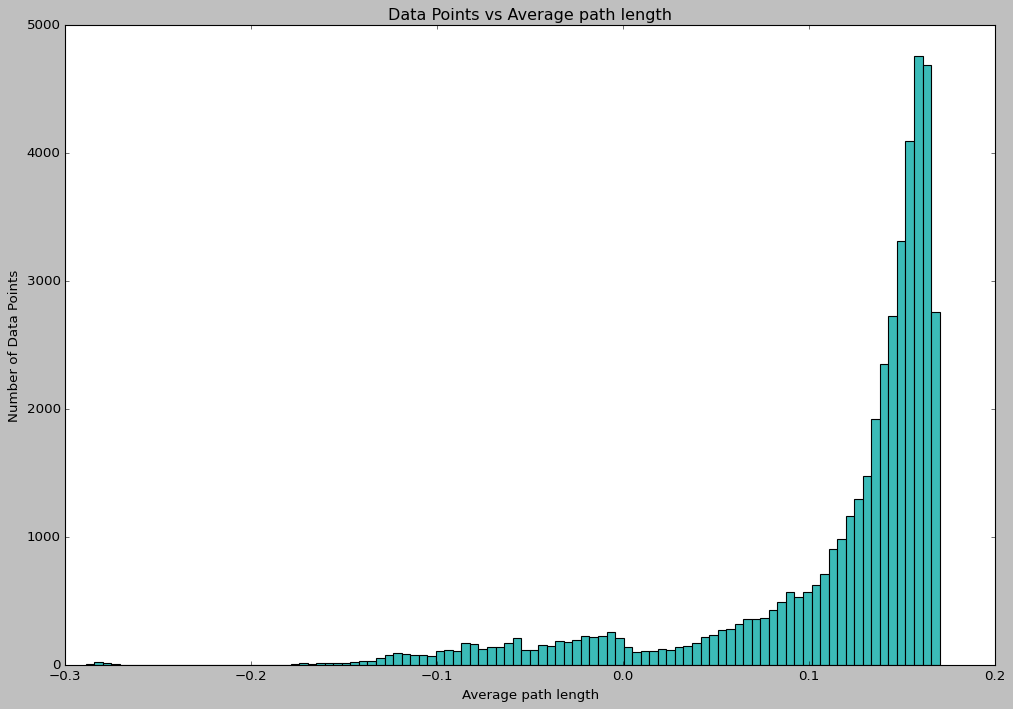

In [124]:
plt.figure(figsize=(15,10))
plt.hist(anomaly_scores, bins=100, color='#3bbbb8')
plt.title('Data Points vs Average path length')
plt.xlabel('Average path length')
plt.ylabel('Number of Data Points')
plt.show()

In [125]:
from sklearn.metrics import roc_auc_score


In [126]:
anomalies=anomaly_scores  > -0.19
matches=  yval == list(encoder.classes_).index('normal.')
auc=roc_auc_score(anomalies, matches)
print(f'AUC : {auc:0.2%}')


AUC : 98.21%


In [127]:
anomaly_scores_test=isolation_forest.decision_function(xtest)

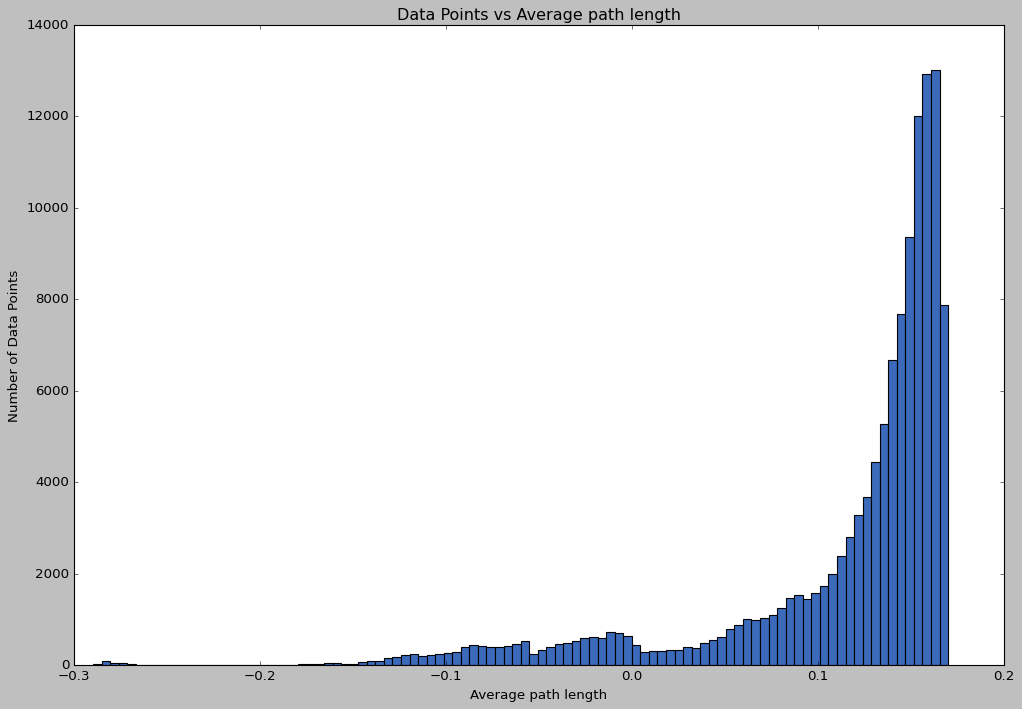

In [128]:
plt.figure(figsize=(15,10))
plt.hist(anomaly_scores_test, bins=100, color='#3b6abb')
plt.title('Data Points vs Average path length')
plt.xlabel('Average path length')
plt.ylabel('Number of Data Points')
plt.show()

In [129]:
anomalies_test=anomaly_scores_test  > -0.19
matches_test=  ytest == list(encoder.classes_).index('normal.')
auc_test=roc_auc_score(anomalies_test, matches_test)
print(f'AUC : {auc_test:0.2%}')

AUC : 96.65%
